In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
url = "https://huggingface.co/datasets/AHFIDAILabs/merged_vaccines/resolve/main/clean_scraped_posts.csv"


df = pd.read_csv(url, low_memory=False)

In [5]:
df.head(2)

,Tweet_Text,Reply_Count,Retweet_Count,Like_Count,View_Count,Language,Source,Username,Location,year,month,day,hour,minute,weekday,Post_ID,ID_Source
0,The HPV vaccine is a critical step in preventi...,1.0,0.0,2.0,81.0,English,Twitter,VaccineNet_NG,"Lagos, Nigeria",2024,7,1,17,58,Monday,"=""1807821100576895401""",Platform_ID
1,"New month, new experiences, new opportunities,...",0.0,0.0,2.0,50.0,English,Twitter,VaccineNet_NG,Abuja. Nigeria.,2024,7,1,15,2,Monday,"=""1807776904805580853""",Platform_ID


In [6]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source'],
      dtype='object')

In [13]:
df1 = df.copy()

In [11]:
save_path = r"C:\Users\hp\Desktop\immuniwatch_plots"
os.makedirs(save_path, exist_ok=True)

In [18]:
df["Language"].value_counts().head(20)

Language
English        35947
Igbo            2357
French           675
Chinese          534
Yoruba           485
Hausa            470
Spanish          458
German           342
Kinyarwanda      278
Tagalog          238
Japanese         228
Italian          219
Indonesian       198
Hindi            144
Swedish          142
Malay            122
Polish           122
Dutch            112
Norwegian         96
Finnish           86
Name: count, dtype: int64

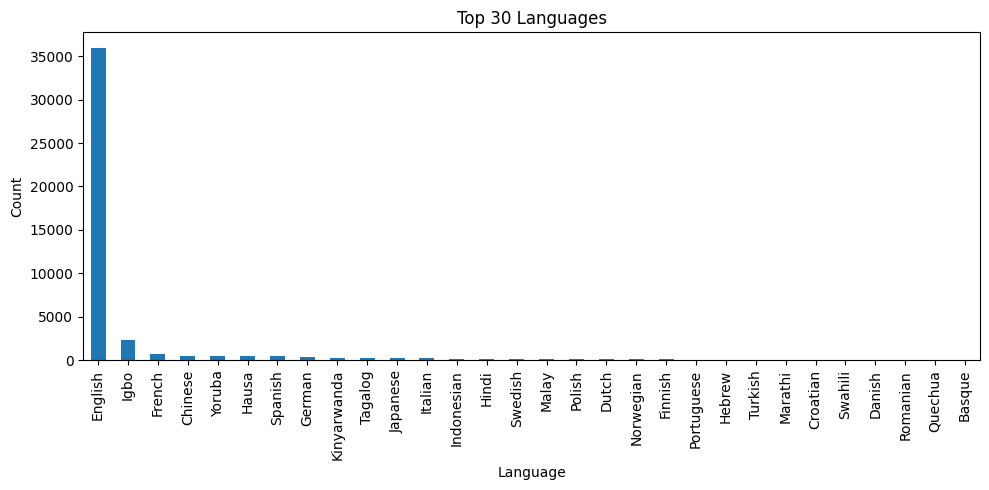

In [27]:
fig = plt.figure(figsize=(10,5))
df["Language"].value_counts().head(30).plot(kind="bar")
plt.title("Top 30 Languages")
plt.xlabel("Language")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [28]:
fig.savefig(os.path.join(save_path, "Language_top30.png"))
plt.close()

# getting the platforms or posting sources are most used

In [30]:
df["Source"].value_counts()

Source
Facebook     26794
Twitter      17507
TikTok         398
Instagram      300
Blogs            6
Name: count, dtype: int64

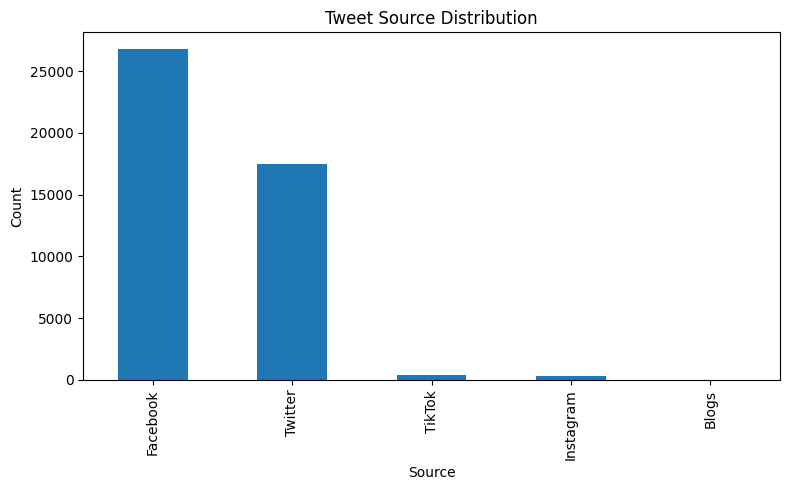

In [31]:
fig = plt.figure(figsize=(8,5))
df["Source"].value_counts().plot(kind="bar")
plt.title("Tweet Source Distribution")
plt.xlabel("Source")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [32]:
fig.savefig(os.path.join(save_path, "source_distribution.png"))
plt.close()

# locations that contribute most to the vaccine conversation

In [33]:
df["Location"].value_counts().head(20)

Location
Nigeria                           4917
Lagos, Nigeria                    3793
Abuja, Nigeria                    2123
United States                      748
Canada                             413
USA                                405
Florida, USA                       394
Lagos                              348
Earth                              342
Enugu, Nigeria                     282
Lagos Nigeria                      240
Federal Capital Territory, Nig     206
India                              205
Ilorin, Nigeria                    202
Lagos, Nigeria.                    187
London, England                    185
DC via Abuja                       183
Global                             179
United Kingdom                     172
Australia                          167
Name: count, dtype: int64

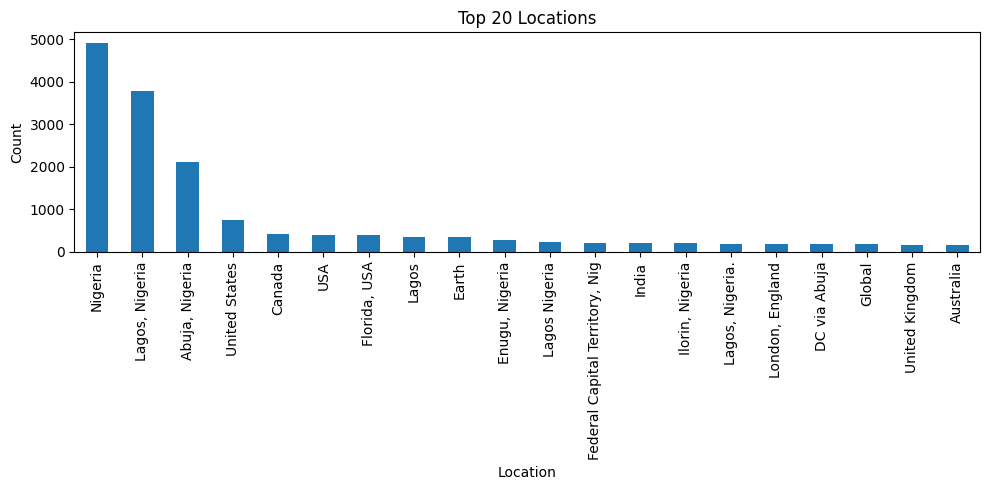

In [34]:
fig = plt.figure(figsize=(10,5))
df["Location"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [35]:
fig.savefig(os.path.join(save_path, "location_top20.png"))
plt.close()

# Tweet activities across days

In [36]:
df["weekday"].value_counts()

weekday
Tuesday      8594
Saturday     7404
Monday       7032
Thursday     6345
Wednesday    6055
Sunday       5683
Friday       3892
Name: count, dtype: int64

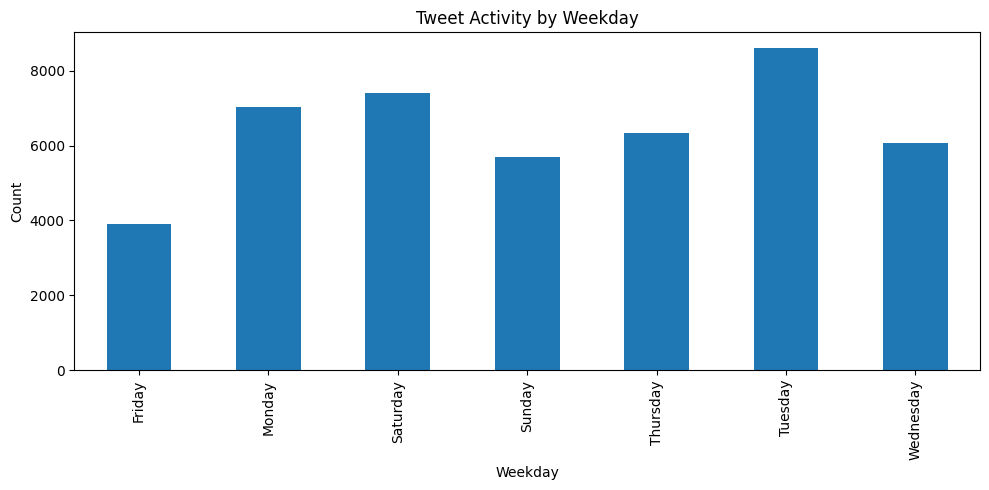

In [37]:
fig = plt.figure(figsize=(10,5))
df["weekday"].value_counts().sort_index().plot(kind="bar")
plt.title("Tweet Activity by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [39]:
fig.savefig(os.path.join(save_path, "weekday_activity.png"))
plt.close()

Observations:

- Tuesday is Peak Day: Tuesday shows the highest activity with approximately 8,600 posts, making it the optimal day for vaccine discourse and potential misinformation spread.
- Mid-Week Dominance: Monday (7,100), Saturday (7,400), and Thursday (6,400) also show strong activity, indicating sustained engagement throughout the week.
- Friday is Lowest: Friday records the lowest activity at approximately 3,900 posts, representing a significant drop (over 50% lower than Tuesday).
Weekend Pattern: Saturday maintains high activity (7,400) while Sunday drops to 5,700, suggesting different weekend engagement patterns.

# user engagement for Reply, Retweet, Like, and View counts.

In [40]:
df[["Reply_Count","Retweet_Count","Like_Count","View_Count"]].describe()

,Reply_Count,Retweet_Count,Like_Count,View_Count
count,45005.000000,45005.000000,45005.000000,4.500500e+04
mean,0.469592,1.590845,10.274370,6.464450e+03
std,8.272584,34.184906,165.675794,2.613530e+05
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000,8.100000e+01
50%,0.000000,0.000000,1.000000,8.100000e+01
75%,0.000000,0.000000,1.000000,8.100000e+01
max,725.000000,2507.000000,9249.000000,2.341014e+07


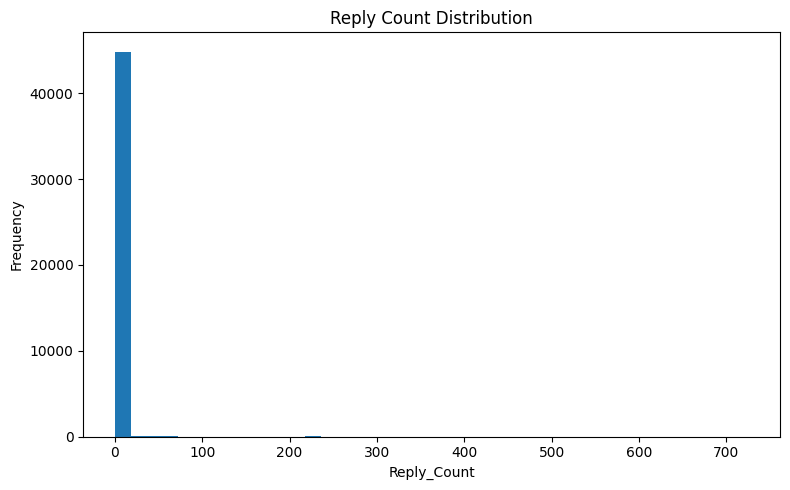

In [41]:
fig = plt.figure(figsize=(8,5))
plt.hist(df["Reply_Count"].dropna(), bins=40)
plt.title("Reply Count Distribution")
plt.xlabel("Reply_Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [42]:
fig.savefig(os.path.join(save_path, "reply_count_hist.png"))
plt.close()

# engagements outliers

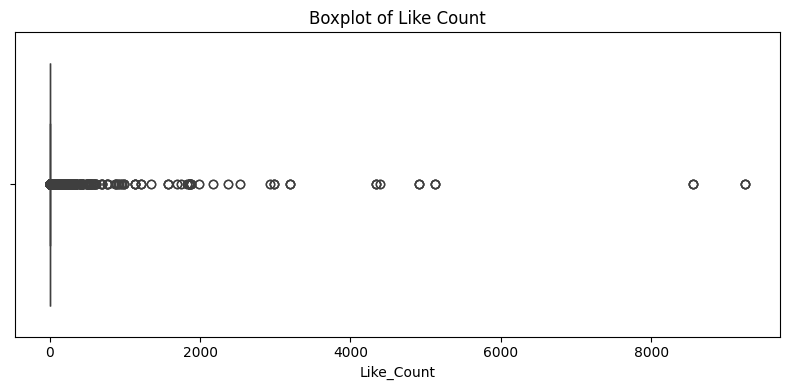

In [45]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(x=df["Like_Count"])
plt.title("Boxplot of Like Count")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(save_path, "like_count_boxplot.png"))
plt.close()

In [46]:
df["tweet_length"] = df["Tweet_Text"].astype(str).apply(len)

In [48]:
df.columns

Index(['Tweet_Text', 'Reply_Count', 'Retweet_Count', 'Like_Count',
       'View_Count', 'Language', 'Source', 'Username', 'Location', 'year',
       'month', 'day', 'hour', 'minute', 'weekday', 'Post_ID', 'ID_Source',
       'tweet_length'],
      dtype='object')

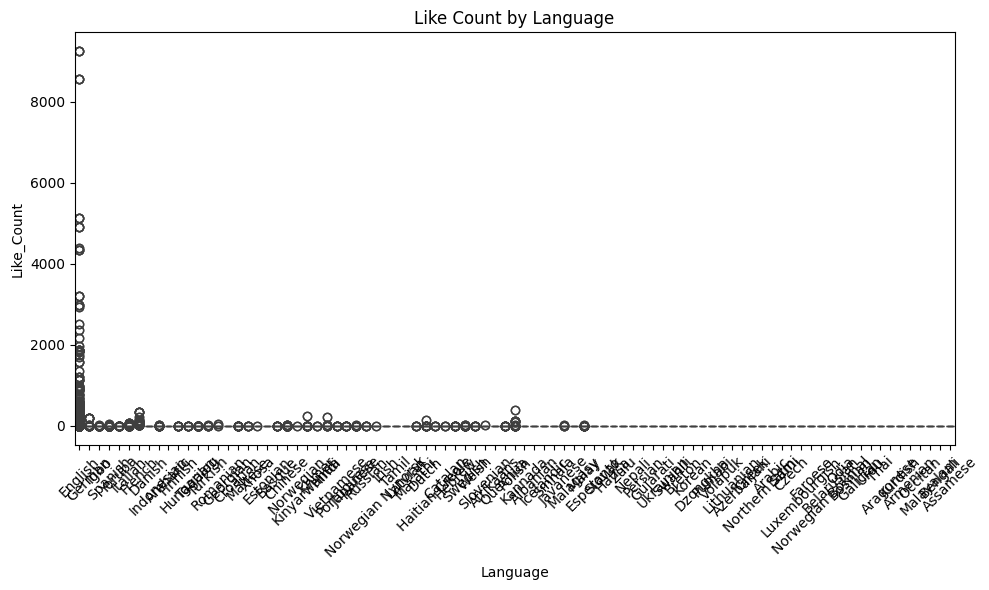

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Language", y="Like_Count", data=df)
plt.title("Like Count by Language")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig(os.path.join(save_path, "like_by_language.png"))
plt.close()

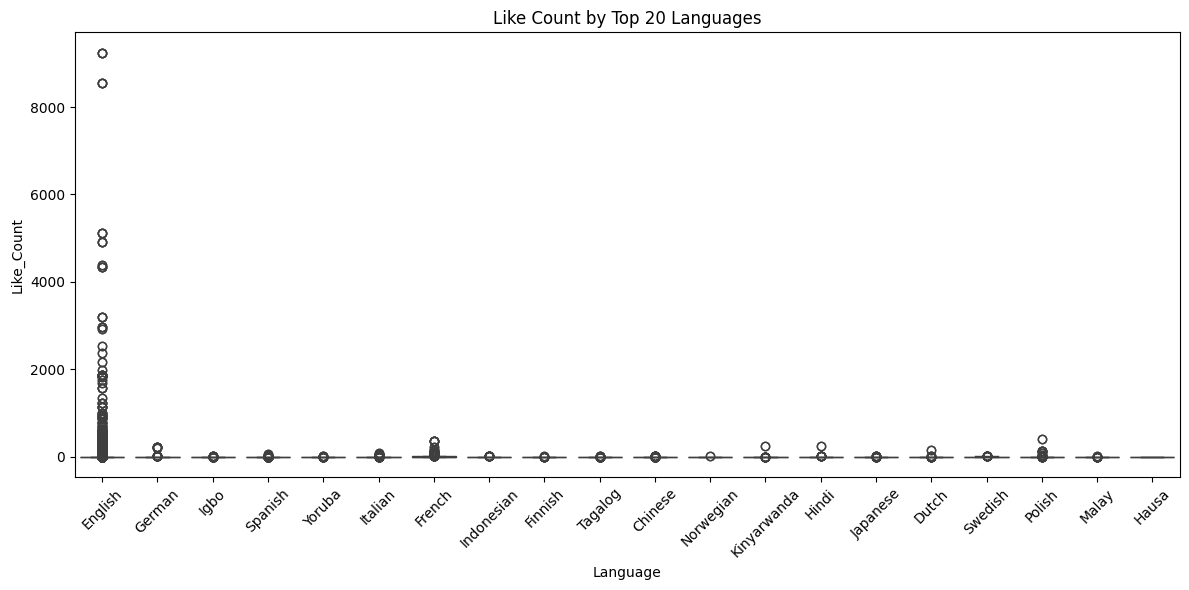

In [50]:
top_languages = df["Language"].value_counts().head(20).index

fig = plt.figure(figsize=(12,6))
sns.boxplot(x="Language", y="Like_Count", data=df[df["Language"].isin(top_languages)])
plt.title("Like Count by Top 20 Languages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
fig.savefig(os.path.join(save_path, "like_by_top_languages.png"))
plt.close()

In [51]:
# k wing teh platfroms that generates teh highest engagemnets

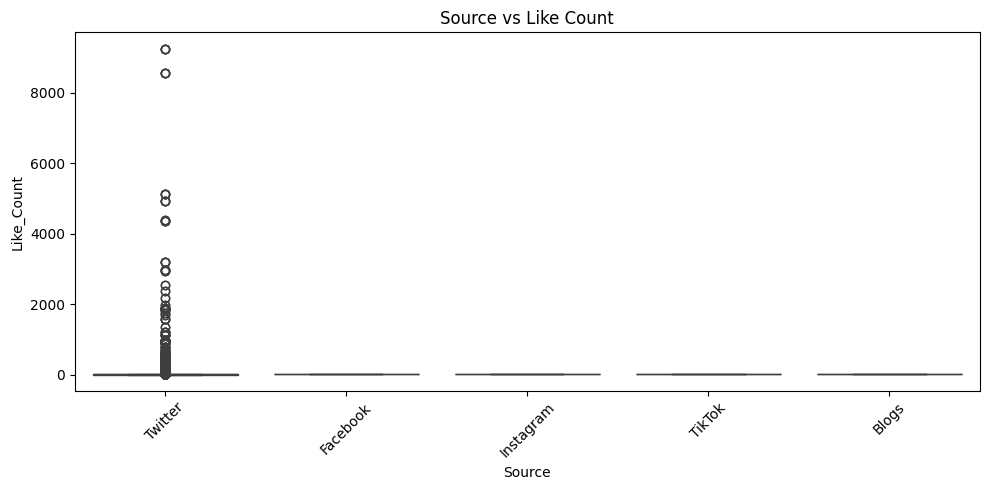

In [53]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="Source", y="Like_Count", data=df)
plt.xticks(rotation=45)
plt.title("Source vs Like Count")
plt.tight_layout()
plt.show()


In [54]:
fig.savefig(os.path.join(save_path, "source_vs_likes.png"))
plt.close()


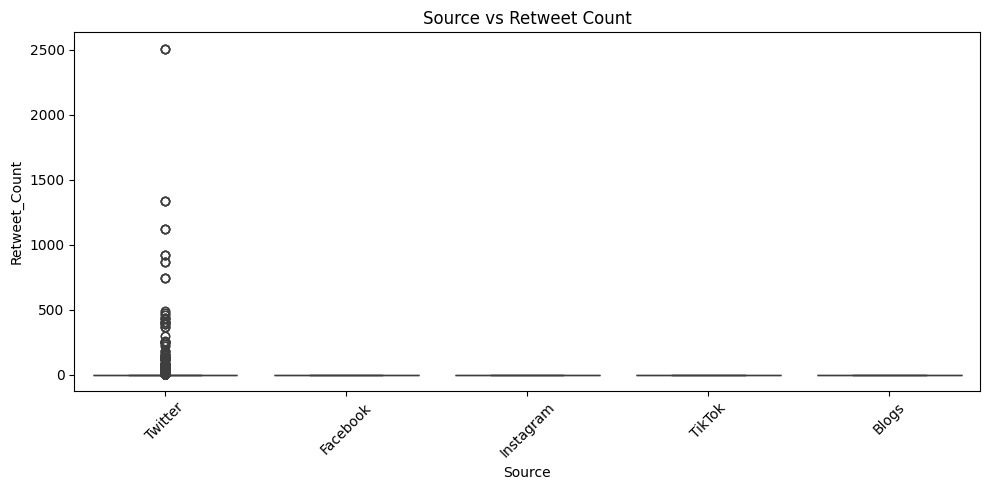

In [56]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="Source", y="Retweet_Count", data=df)
plt.xticks(rotation=45)
plt.title("Source vs Retweet Count")
plt.tight_layout()
plt.show()


In [57]:
fig.savefig(os.path.join(save_path, "source_vs_retweets.png"))
plt.close()


In [58]:
#locations where vaccines dicussions trend more

In [61]:
top_locations = df["Location"].value_counts().head(10).index
subset = df[df["Location"].isin(top_locations)]



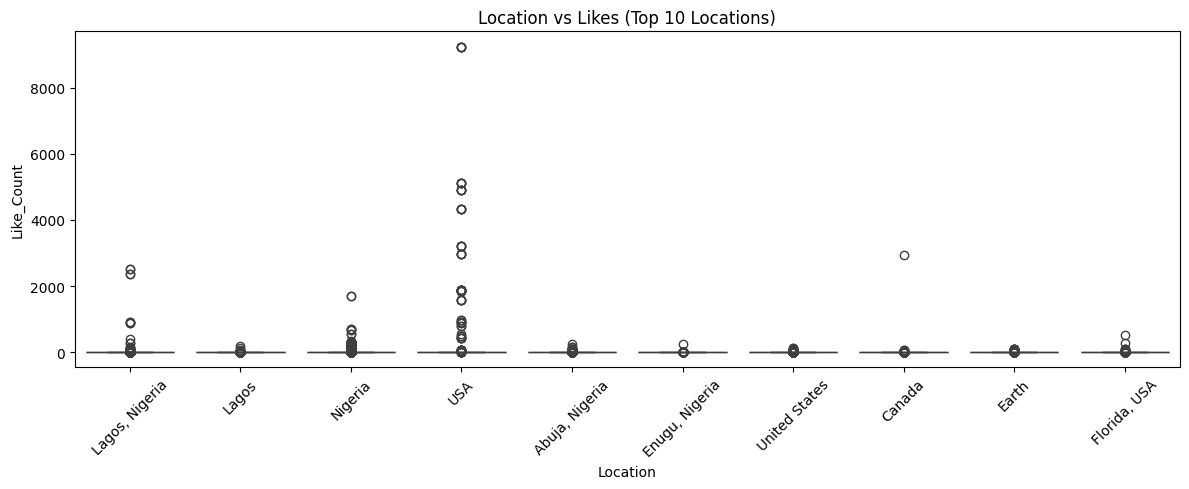

In [63]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x="Location", y="Like_Count", data=subset)
plt.xticks(rotation=45)
plt.title("Location vs Likes (Top 10 Locations)")
plt.tight_layout()
plt.show()

In [64]:
fig.savefig(os.path.join(save_path, "location_vs_likes.png"))
plt.close()

In [65]:
# day in which awareness and misinformation spread faster

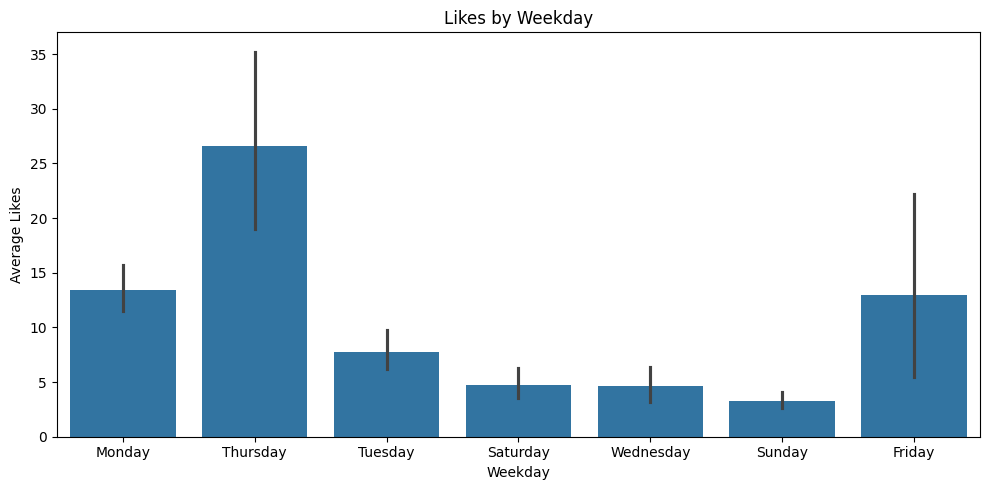

In [66]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x="weekday", y="Like_Count", data=df)
plt.title("Likes by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Likes")
plt.tight_layout()
plt.show()


In [67]:
fig.savefig(os.path.join(save_path, "weekday_vs_likes.png"))
plt.close()

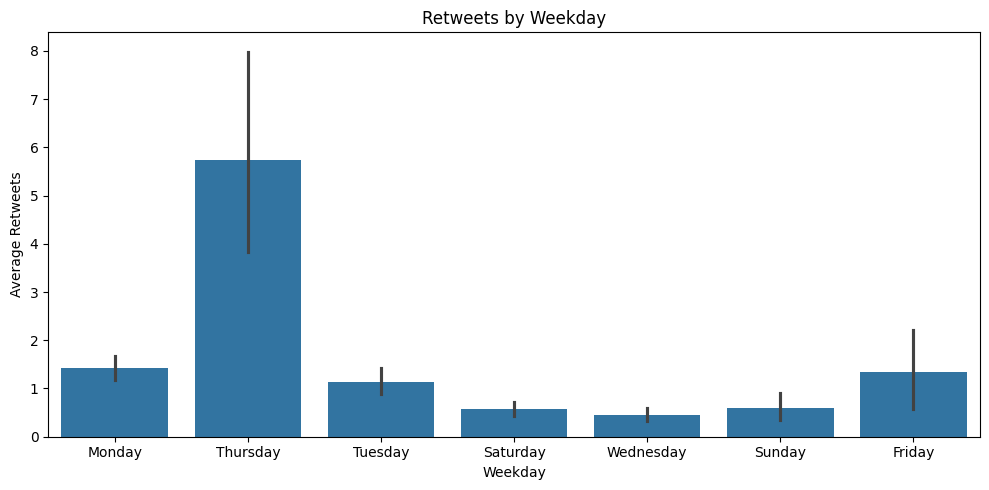

In [69]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x="weekday", y="Retweet_Count", data=df)
plt.title("Retweets by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Retweets")
plt.tight_layout()
plt.show()


In [70]:
plt.savefig(os.path.join(save_path, "weekday_vs_retweets.png"))
plt.close()

In [71]:
#correlation bwtwen like and retweets

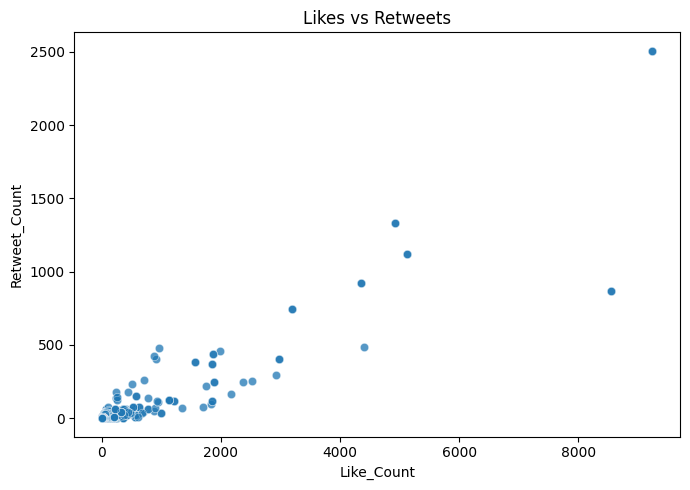

In [72]:
fig = plt.figure(figsize=(7,5))
sns.scatterplot(x="Like_Count", y="Retweet_Count", data=df, alpha=0.5)
plt.title("Likes vs Retweets")
plt.tight_layout()
plt.show()

In [73]:
fig.savefig(os.path.join(save_path, "likes_vs_retweets.png"))
plt.close()

In [76]:
# getting the most common words in vaccine

In [79]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [83]:

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_text"] = df["Tweet_Text"].apply(clean_text)

all_words = []
for sentence in df["clean_text"]:
    words = [w for w in sentence.split() if w not in stop_words]
    all_words.extend(words)

word_counts = Counter(all_words).most_common(50)
word_table = pd.DataFrame(word_counts, columns=["word", "count"])
word_table.head(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,count
0,vaccine,4828
1,vaccines,3264
2,polio,2964
3,people,2808
4,health,2060
5,one,2033
6,get,1907
7,dont,1806
8,baby,1747
9,good,1745


In [85]:
import re
from collections import Counter

def extract_hashtags(text):
    return re.findall(r"#\w+", str(text).lower())

df["hashtags"] = df["Tweet_Text"].apply(extract_hashtags)

all_hashtags = []
df["hashtags"].apply(lambda x: all_hashtags.extend(x))

hashtag_counts = Counter(all_hashtags).most_common(30)
hashtag_table = pd.DataFrame(hashtag_counts, columns=["hashtag", "count"])
hashtag_table


,hashtag,count
0,#soiltransmittedhelminths,82
1,#banmalariavaccines,80
2,#vaccineswork,67
3,#elephantiasis,62
4,#healthforall,60
5,#filariasis,56
6,#worldpolioday,54
7,#fyp,54
8,#lymphaticdrainage,52
9,#preptalk,48


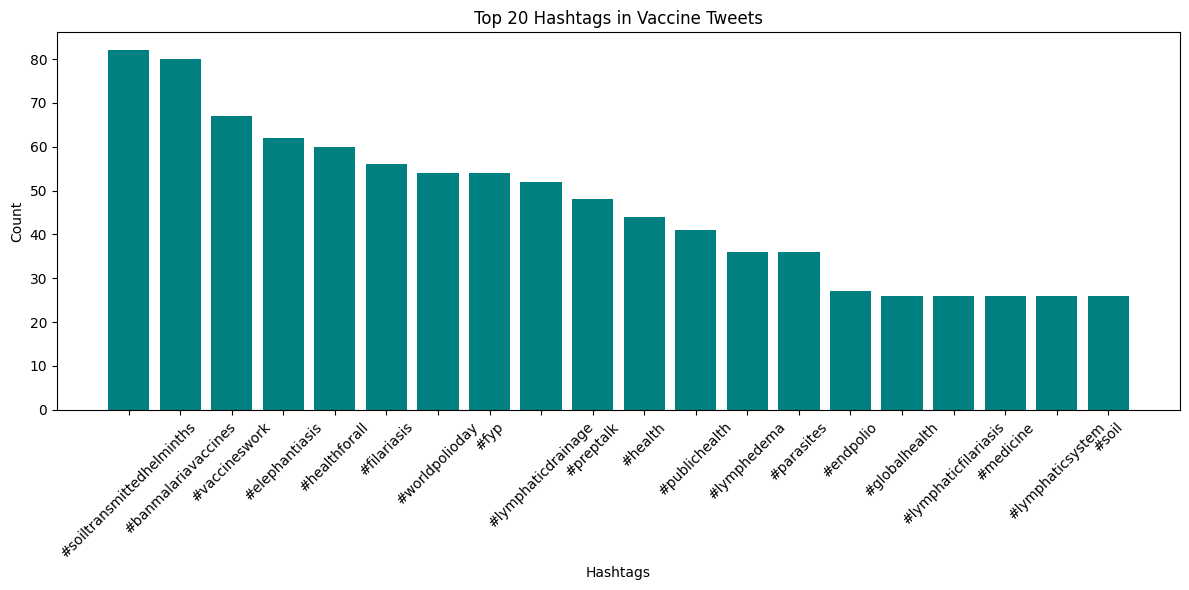

In [91]:
top_hashtags = hashtag_table.head(20)

fig = plt.figure(figsize=(12,6))
plt.bar(top_hashtags["hashtag"], top_hashtags["count"], color="teal")
plt.title("Top 20 Hashtags in Vaccine Tweets")
plt.xticks(rotation=45)
plt.xlabel("Hashtags")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [92]:
fig.savefig(os.path.join(save_path, "top20_hashtags.png"))
plt.close()

In [86]:
# Countries with more support vs hesitancy indicators

In [88]:
support_keywords = ["vaccine", "vaccinated", "protect", "immunity", "safe", "effective"]
hesitant_keywords = ["hesitant", "side effects", "unsafe", "fear", "doubt", "risk", "misinformation"]


In [89]:
def keyword_count(text, keywords):
    text = str(text).lower()
    return sum(1 for k in keywords if k in text)

df["support_score"] = df["clean_text"].apply(lambda x: keyword_count(x, support_keywords))
df["hesitant_score"] = df["clean_text"].apply(lambda x: keyword_count(x, hesitant_keywords))


In [90]:
country_support = df.groupby("Location")["support_score"].sum().sort_values(ascending=False)
country_hesitancy = df.groupby("Location")["hesitant_score"].sum().sort_values(ascending=False)

support_table = country_support.reset_index().rename(columns={"support_score":"support_mentions"})
hesitancy_table = country_hesitancy.reset_index().rename(columns={"hesitant_score":"hesitancy_mentions"})

support_table.head(10), hesitancy_table.head(10)


(         Location  support_mentions
 0         Nigeria               871
 1  Lagos, Nigeria               721
 2  Abuja, Nigeria               416
 3   United States               116
 4             USA               108
 5           Lagos                81
 6    Florida, USA                72
 7          Canada                69
 8  Enugu, Nigeria                66
 9           Earth                61,
                Location  hesitancy_mentions
 0               Nigeria                  63
 1        Abuja, Nigeria                  56
 2        Lagos, Nigeria                  51
 3         United States                  14
 4                Earth                   13
 5                   USA                  10
 6  Saskatchewan, Canada                  10
 7     Republic of World                   8
 8              Farmcity                   8
 9       London, England                   7)

In [95]:
misinfo_keywords = [
    "microchip", "5g", "plandemic", "hoax", "killer", "fake",
    "experiment", "sterilize", "agenda", "bioweapon",
    "anticovid", "natural immunity"
]

def keyword_count(text, keywords):
    text = str(text).lower()
    return sum(1 for k in keywords if k in text)

df["misinfo_score"] = df["clean_text"].apply(lambda x: keyword_count(x, misinfo_keywords))

In [96]:
misinfo_table = df.groupby("Location")["misinfo_score"].sum().sort_values(ascending=False).reset_index()
misinfo_table = misinfo_table.rename(columns={"misinfo_score":"misinformation_mentions"})
misinfo_table.head(15)

,Location,misinformation_mentions
0,Nigeria,75
1,"Lagos, Nigeria",47
2,"Abuja, Nigeria",30
3,Krrkrrkrr,14
4,"Vancouver, British Columbia",12
5,"Zion, In Christ",12
6,World wide,11
7,Victoria island,10
8,"San Antonio, TX",8
9,Infront of You,8


In [97]:
combined_table = support_table.merge(hesitancy_table, on="Location", how="outer").merge(misinfo_table, on="Location", how="outer").fillna(0)
combined_table["total_score"] = combined_table["support_mentions"] + combined_table["hesitancy_mentions"] + combined_table["misinformation_mentions"]

top_locations_combined = combined_table.sort_values("total_score", ascending=False).head(20)
top_locations_combined


,Location,support_mentions,hesitancy_mentions,misinformation_mentions,total_score
1274,Nigeria,871,63,75,1009
971,"Lagos, Nigeria",721,51,47,819
94,"Abuja, Nigeria",416,56,30,502
1874,United States,116,14,8,138
1855,USA,108,10,5,123
628,"Florida, USA",72,7,7,86
955,Lagos,81,4,0,85
365,Canada,69,6,5,80
576,"Enugu, Nigeria",66,3,4,73
539,Earth,61,4,5,70


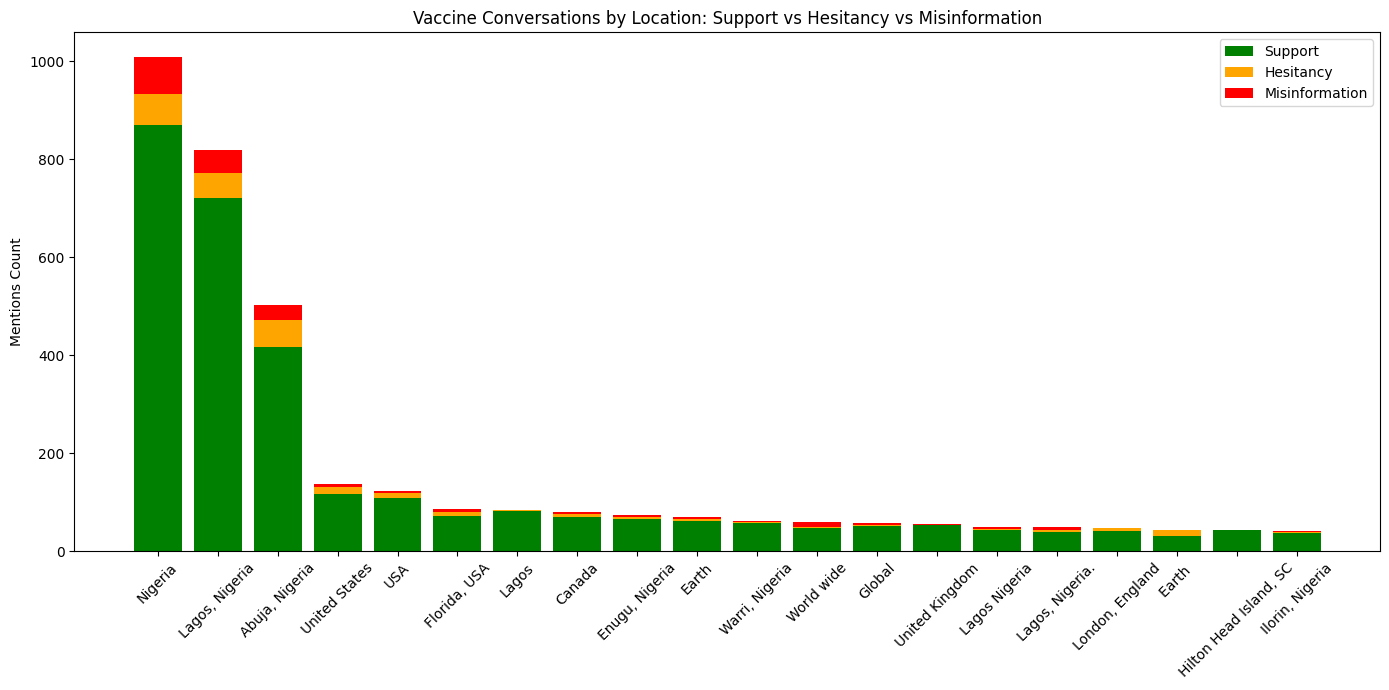

In [98]:


save_path = r"C:\Users\hp\Desktop\immuniwatch_plots"
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(14,7))
plt.bar(top_locations_combined["Location"], top_locations_combined["support_mentions"], label="Support", color="green")
plt.bar(top_locations_combined["Location"], top_locations_combined["hesitancy_mentions"], bottom=top_locations_combined["support_mentions"], label="Hesitancy", color="orange")
plt.bar(top_locations_combined["Location"], top_locations_combined["misinformation_mentions"], bottom=top_locations_combined["support_mentions"] + top_locations_combined["hesitancy_mentions"], label="Misinformation", color="red")

plt.title("Vaccine Conversations by Location: Support vs Hesitancy vs Misinformation")
plt.xticks(rotation=45)
plt.ylabel("Mentions Count")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
plt.savefig(os.path.join(save_path, "support_hesitancy_misinformation_top20.png"))
plt.close()